# Piyush Kumar Gaurav
# Roll No. 20104442
# Quiz-1

# Importing Suggested Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1 - Based on automobile dataset from the UCI repository


## Following are some useful customized function in order to solve for Q1

In [2]:
attribute = ["symboling", "normalized-losses", "make", "fuel-type",
            "aspiration", "num-of-doors", "body-style","drive-wheels",
            "engine-location", "wheel-base", "length", "width", "height",
            "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
            "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
            "peak-rpm", "city-mpg", "highway-mpg", "price"]

data_type = [("symboling","Nominal"),("normalized-losses","Continuous"),("make","Nominal"),("fuel-type","Nominal"),
            ("aspiration","Nominal"),("num-of-doors","Nominal"),("body-style","Nominal"),("drive-wheels","Nominal"),
            ("engine-location","Nominal"), ("wheel-base","Continuous"),("length","Continuous"),("width","Continuous"), 
            ("height","Continuous"),("curb-weight","Continuous"),("engine-type","Nominal"),("num-of-cylinders","Nominal"),
            ("engine-size","Continuous"),("fuel-system","Nominal"),("bore","Continuous"),("stroke","Continuous"),
            ("compression-ratio","Continuous"),("horsepower","Continuous"),("peak-rpm","Continuous"),("city-mpg","Continuous"),
            ("highway-mpg","Continuous"),("price","Continuous")]


def clean_auto_dataframe(df):
    ''' 
    This fn is a part of data preprocessing. This fn. does following:
    1. Replaces "?" in the data by NaN, 
    2. Drop the rows only where our target (price) is missing.
    3. Impute Missing data in diff. features by replacing it by mode. 
    
    input: df -> panda dataframe
    output: df - panda dataframe (after processing)
    '''
    df.replace("?",np.NaN, inplace=True)
    df.dropna(subset=['price'], inplace=True)
    df['horsepower'].replace([np.NaN], [df['horsepower'].mode()], inplace=True)
    df['peak-rpm'].replace([np.NaN], [df['peak-rpm'].mode()], inplace=True)
    df['stroke'].replace([np.NaN], [df['stroke'].mode()], inplace=True)
    df['bore'].replace([np.NaN], [df['bore'].mode()], inplace=True)
    df['num-of-doors'].replace([np.NaN], [df['num-of-doors'].mode()], inplace=True)
    df['normalized-losses'].replace([np.NaN], [df['normalized-losses'].mode()], inplace=True)
    return df

def remove_irrelevant_cols(df):
    ''' 
    This fn is a part of data preprocessing. This fn. does following:
    1. Removes the column which seeems logically irrelevant (least relevant) for price estimation 
    
    input: df -> panda dataframe
    output: df - panda dataframe (after processing)
    '''
    irrelevant_feature = ["symboling","normalized-losses","fuel-type","aspiration","drive-wheels",
             "engine-location","engine-type", "bore", "stroke", "compression-ratio", "highway-mpg"]
    df.drop(irrelevant_feature, axis = 1, inplace=True)
    return df

def change_few_dtype(df):
    ''' 
    This fn is a part of data preprocessing. The data contains some continuous values as Integer.
    Their type is changed to float
    This fn. does following:
    1. Changes int data type to float for fields like curb-weight, engine-size, 
    horsepower, peak-rpm, city-mpg, price
    
    input: df -> panda dataframe
    output: df - panda dataframe (after processing)
    '''
    df['curb-weight'] = df['curb-weight'].astype(float, errors = 'raise')
    df['engine-size'] = df['engine-size'].astype(float, errors = 'raise')
    df['horsepower'] = df['horsepower'].astype(float, errors = 'raise')
    df['peak-rpm'] = df['peak-rpm'].astype(float, errors = 'raise')
    df['city-mpg'] = df['city-mpg'].astype(float, errors = 'raise')
    df['price'] = df['price'].astype(float, errors = 'raise')
    return df

def to_one_hot_encoded_df(df):
    ''' 
    This fn is a part of data preprocessing. The data contains some categorical features ("obj_type_cols").
    These features are one hot encoded and every variant beacomes a separate feature.
    This fn. does following:
    1. Categories of categorical features are identified and they are made separate feature themselves
    2. These categorical features are encoded (0 or 1)
    
    input: df -> panda dataframe
    output: onehot_df - panda dataframe (after separating categorical and one hot encoding)
    '''
    obj_type_cols = ["make","num-of-doors", "body-style","num-of-cylinders","fuel-system"]
    onehot_df = pd.get_dummies(df, columns=obj_type_cols)
    target = onehot_df['price']
    onehot_df.drop(labels=['price'], axis=1, inplace = True)
    onehot_df.insert(53, 'price', target)
    return onehot_df

def feature_scaling(df):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. Feature scaling for all continuous valued features based on min and max data in metadata from repository
    2. These categorical features are already 0 or 1
    
    input: df -> panda dataframe
    output: df - panda dataframe (after feature scaling)
    '''
    wheelbase_lc = 86.6
    wheelbase_uc = 120.9
    length_lc = 141.1
    length_uc = 208.1
    width_lc = 60.3
    width_uc = 72.3
    height_lc = 47.8
    height_uc = 59.8
    curbweight_lc = 1488 
    curbweight_uc = 4066
    enginesize_lc = 61
    enginesize_uc = 326
    horsepower_lc = 48
    horsepower_uc = 288
    peakrpm_lc = 4150
    peakrpm_uc = 6600
    citympg_lc = 13
    citympg_uc = 49
    
    df['wheel-base'] = (df['wheel-base'] - wheelbase_lc )/(wheelbase_uc - wheelbase_lc)
    df['length'] = (df['length'] - length_lc )/(length_uc - length_lc)
    df['width'] = (df['width'] - width_lc )/(width_uc - width_lc)
    df['height'] = (df['height'] - height_lc )/(height_uc - height_lc)
    df['curb-weight'] = (df['curb-weight'] - curbweight_lc )/(curbweight_uc - curbweight_lc)
    df['engine-size'] = (df['engine-size'] - enginesize_lc )/(enginesize_uc - enginesize_lc)
    df['horsepower'] = (df['horsepower'] - horsepower_lc )/(horsepower_uc - horsepower_lc)
    df['peak-rpm'] = (df['peak-rpm'] - peakrpm_lc )/(peakrpm_uc - peakrpm_lc)
    df['city-mpg'] = (df['city-mpg'] - citympg_lc )/(citympg_uc - citympg_lc)
    df = df.astype(float, errors = 'raise')
        
    return df

def panda2nparray(df):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. Converts pandas data frame to numpy array of data.
    2. separates X data (features) and Y data (target)
    3. stores sequence of feature as arranged in numpy array 
    
    input: df -> panda dataframe
    output: X_data -> 2D feature data np array of size "no of data points" X "no of features"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            feature_list - a list (having feature name in seq. corresponding to columns of X_data)
    '''
    feature_list = df.columns
    data = df.to_numpy()
    X_data = data[:,:-1]
    Y_data = data[:,-1]
    return X_data, Y_data, feature_list
    
    
def random_shuffle(X_data, Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. randomly shuffles X and Y data
    2. keeps a track of correspondence between X and Y.
    3. Feature sequence of X data remains unaltered.
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
    output: X_data_shuffle -> randomly shuffled 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target array (here, price) of length "no of data points" corresponding to "X_data_shuffle"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    seq = []
    
    for l in range(no_data_points):
        seq.append(l)
        np.random.shuffle(seq)
        
    X_data_shuffle = []
    Y_data_shuffle = []
    for m in range(no_data_points):
        X_data_shuffle.append(X_data[seq[m],:])
        Y_data_shuffle.append(Y_data[seq[m]])
    X_data_shuffle = np.array(X_data_shuffle)
    Y_data_shuffle = np.array(Y_data_shuffle)
    return X_data_shuffle, Y_data_shuffle

def traintest_split(X_data, Y_data, test_size):
    ''' 
    This fn splits dataset into training and testing data.
    This fn. does following:
    1. splits dataset into training and testing data.
    2. based on fraction ("test_size")
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           test_size -> float, fraction of data to be splitted as test, rest is training
    output: X_train -> 2D feature data np array of size "(1-test_size) * no of data points" X "no of features"
            X_test -> 2D feature data np array of size "(test_size) * no of data points" X "no of features"
            Y_train -> 1D target np array (here, price) of length "(1-test_size) * no of data points"
            Y_test -> 1D target np array (here, price) of length "(test_size) * no of data points"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    no_data_points_test = int(np.floor(no_data_points * test_size))
    no_data_points_train = no_data_points - no_data_points_test
    
    X_train = X_data[0:no_data_points_train,:]
    X_test = X_data[no_data_points_train:,:]
    Y_train = Y_data[0:no_data_points_train]
    Y_test = Y_data[no_data_points_train:]
    
    return X_train, X_test, Y_train, Y_test

def validation_kfold(X_train, Y_train, k):
    ''' 
    This function implements K-fold validation
    This fn. does following:
    1. splits dataset into "k" distinct sets
    2. arrange all k sets in a specific format
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           test_size -> float, fraction of data to be splitted as test, rest is training
    output: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
            Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
    '''
    no_data_points = X_train.shape[0]
    no_feature = X_train.shape[1]
    no_each_set = int(np.floor(no_data_points/k))
    #print(no_each_set)
    X_kfold = []
    Y_kfold = []
    temp_X = []
    temp_Y = []
    for i in range(k):
        for j in range(no_each_set):
            temp_X.append(X_train[(no_each_set*i)+j,:])
            temp_Y.append(Y_train[(no_each_set*i)+j])
        X_kfold.append(np.array(temp_X))
        Y_kfold.append(np.array(temp_Y))
        temp_X = []
        temp_Y = []
    X_kfold = np.array(X_kfold)
    Y_kfold = np.array(Y_kfold)
    return X_kfold, Y_kfold

def prepare_autodataset(data_path, attrbute_in_seq):
    ''' 
    This function does pre processing by utilising functions described above
    This fn. does following:
    1. Read data csv file
    2. Remove missing data, 
    3. Select relevant feature, 
    4. Making Data type uniform, 
    5. One Hot Encoding
    6. Feature Scaling, 
    7. Converting from panda df to nparray, 
    8. Random Data shuffling.
    
    input: data_path -> data file with address
           attrbute_in_seq -> a list of feature / attribute of automobile dataset (in sequence)
    output: X_data_shuffle -> 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target np array (here, price) of length "no of data points"
    '''
    df = pd.read_csv(data_path, names = attrbute_in_seq)
    clean_df = clean_auto_dataframe(df)
    relevant_df = remove_irrelevant_cols(clean_df)
    float_rel_df = change_few_dtype(relevant_df)
    onehot_df = to_one_hot_encoded_df(float_rel_df)
    feature_scaled_df = feature_scaling(onehot_df)
    X_data, Y_data, feature_list = panda2nparray(feature_scaled_df)
    X_data_shuffle, Y_data_shuffle = random_shuffle(X_data, Y_data)
    return X_data_shuffle, Y_data_shuffle, feature_list

def train_KNN_with_Kfold(X_kfold, Y_kfold, Kneighbor):
    ''' 
    This function trains a KNN classifier using k-fold validation.
    This fn. does following:
    1. Takes a data as output of "validation_kfold" i.e. k sets of data
    2. Picks one set and treat is as test data.  Compute distance from all other points in k-1 sets
    3. Evaluate "Kneighbor" points having least distances
    4. compute Avg Price from these "Kneighbor" ponts and determine error
    3. Take the error average for a set and stores in a list
    
    input: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
           Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
           Kneighbor -> No. of neighbour to be considered
    output: err_all -> list of k lists. each sub list is least square error
            avg_err -> list of k average errors
    '''
    no_of_set = X_kfold.shape[0]
    no_dp_in_each_set = X_kfold.shape[1]
    no_feature = X_kfold.shape[2]
    price_est = []
    err_all = []
    avg_err = []
    for i in range(no_of_set):
        data_train =  np.zeros((1,no_feature))
        target_train = np.array([])
        data_eval = X_kfold[i,:,:]
        target_eval = Y_kfold[i,:]
        
        for j in range(no_of_set):
            if j!=i:
                data_train = np.append(data_train, X_kfold[j,:,:], axis = 0)
                target_train = np.append(target_train, Y_kfold[j,:])
        err_val = []
        price_val = []
        data_train = np.delete(data_train, 0, axis=0)
        for k in range(no_dp_in_each_set):
            diff = data_train - data_eval[k,:]
            dist = np.linalg.norm(diff, axis=1)
            k_min_ind =  np.argpartition(dist, Kneighbor)[:Kneighbor]
            avg_price = 0.0
            for l in k_min_ind:
                avg_price += target_train[l]
            avg_price = avg_price/len(k_min_ind)
            err_val.append(np.sqrt((target_eval[k] - avg_price)**2))
            price_val.append(avg_price)
        avg_err.append(sum(err_val)/len(err_val))
        err_all.append(err_val)
        price_est.append(price_val)
    return err_all, avg_err

# Solution to 1a 
## Train  a  k-nearest  neighbors  regression  model,  and  report  its  validation  set  performance  using  root mean squared error. 

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_path = "./imports-85.data"
attrbute_in_seq = attribute

##### Preparing Automobile Dataset and setting it up for ML application #####

# Remove missing data, Select relevant feature, Making Data type uniform, One Hot Encodeing
# Feature Scaling, Converting from panda df to nparray, Random Data shuffling.
X_data, Y_data, feature_list = prepare_autodataset(data_path, attrbute_in_seq)

#Split data in Training and testing set (Not required for this question)
#X_train, X_test, Y_train, Y_test = traintest_split(X_data, Y_data, 0.25)

# Prepare dataset for k-fold cross validation. Taking k = 7
k=7
X_kfold, Y_kfold = validation_kfold(X_data, Y_data, k)


kNeighbour = 2
err_all, avg_err = train_KNN_with_Kfold(X_kfold, Y_kfold, kNeighbour)
avg_avg_err = sum(avg_err) / len(avg_err)

print("KNN with ", k,"- fold validation and No. of neighbour considered: ", kNeighbour, "\n")
for a in range(len(err_all)):
    print("The avg. error in set ", a, "is", sum(err_all[a])/len(err_all[a]), "\n")
print("The overall average error is: ", avg_avg_err ,"\n")

KNN with  7 - fold validation and No. of neighbour considered:  2 

The avg. error in set  0 is 2319.875 

The avg. error in set  1 is 2342.7321428571427 

The avg. error in set  2 is 1528.267857142857 

The avg. error in set  3 is 1759.5714285714287 

The avg. error in set  4 is 2876.375 

The avg. error in set  5 is 1514.375 

The avg. error in set  6 is 2153.785714285714 

The overall average error is:  2070.711734693877 



# Solution to 1b
## find an optimal k for this model using cross-validation

The avg. error for KNN Classifier with  1  neighbour is 2402.862244897959 

The avg. error for KNN Classifier with  2  neighbour is 2095.0561224489797 

The avg. error for KNN Classifier with  3  neighbour is 2218.8741496598636 

The avg. error for KNN Classifier with  4  neighbour is 2231.706632653061 

The avg. error for KNN Classifier with  5  neighbour is 2322.6510204081637 

The avg. error for KNN Classifier with  6  neighbour is 2444.1045918367345 

The avg. error for KNN Classifier with  7  neighbour is 2432.0911078717195 

The avg. error for KNN Classifier with  8  neighbour is 2460.605229591837 

The avg. error for KNN Classifier with  9  neighbour is 2471.12925170068 

The avg. error for KNN Classifier with  10  neighbour is 2477.411734693878 

The avg. error for KNN Classifier with  11  neighbour is 2494.3172541743975 

The avg. error for KNN Classifier with  12  neighbour is 2455.1696428571427 

The avg. error for KNN Classifier with  13  neighbour is 2453.0274725274726 

T

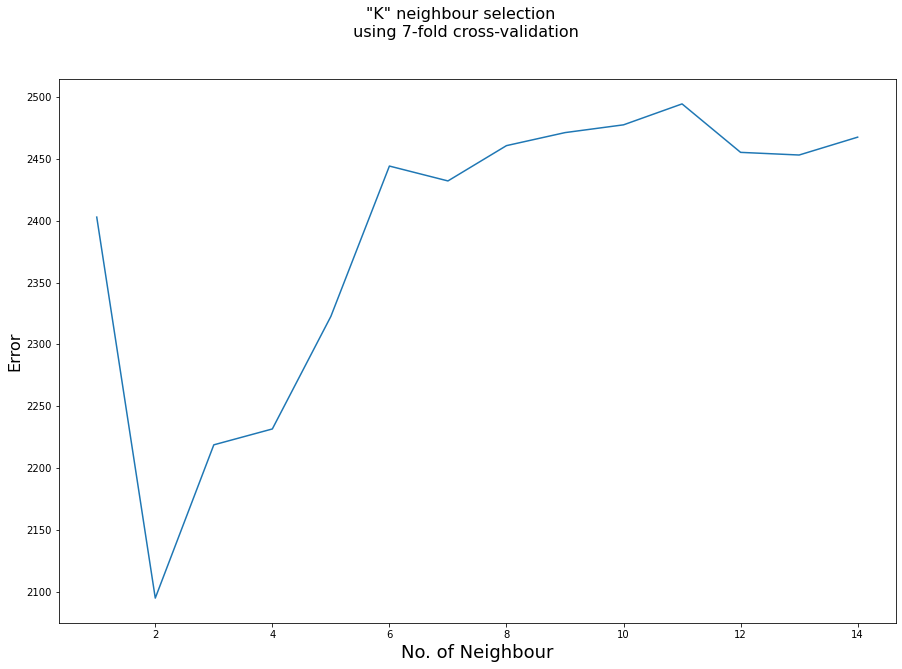

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_path = "./imports-85.data"
attrbute_in_seq = attribute

##### Preparing Automobile Dataset and setting it up for ML application #####

# Remove missing data, Select relevant feature, Making Data type uniform, One Hot Encodeing
# Feature Scaling, Converting from panda df to nparray, Random Data shuffling.
X_data, Y_data, feature_list = prepare_autodataset(data_path, attrbute_in_seq)

#Split data in Training and testing set (Not required for this question)
#X_train, X_test, Y_train, Y_test = traintest_split(X_data, Y_data, 0.25)

# Prepare dataset for k-fold cross validation. Taking k = 7
k=7
X_kfold, Y_kfold = validation_kfold(X_data, Y_data, k)

avg_kNN_err = []
neighb = []
for kNeighbour in range(1,15):
    err_all, avg_err = train_KNN_with_Kfold(X_kfold, Y_kfold, kNeighbour)
    avg_avg_err = sum(avg_err) / len(avg_err)
    neighb.append(kNeighbour)
    avg_kNN_err.append(avg_avg_err)
    print("The avg. error for KNN Classifier with ", kNeighbour, " neighbour is", avg_avg_err, "\n")

fig = plt.figure()
fig.set_size_inches(15, 10)
plt.plot(neighb, avg_kNN_err)
fig.suptitle('"K" neighbour selection \n using 7-fold cross-validation', fontsize=16)
plt.xlabel('No. of Neighbour', fontsize=18)
plt.ylabel('Error', fontsize=16)
print("From the given graph of cross-validation for KNN with no. of neighbours = ", (np.argmin(np.array(avg_kNN_err))+1),", seems to be the best.")

# Solution to 1c
## Introduce L0 regularization into this setup and retrain the model  

The idea utilized in the solution is as follows:

    1. X data (no_of_datapoints X no_of_features) is again clubbed with Target data such that the last column 
    is the target (here "Price") and we have complete dataset in hand.
    
    2. Covariance Matrix is computed for this complete dataset. In the covariance matrix last column represents 
    how price co-vary with other features of the data. Maximum covariance element in this column means 
    that corresponding feature has a strong relation with target ("Price here")
    
    3. We can now keep "keep_N" number of most influential columns/features w.r.t. target ("Price" here). 
    Rest of the features are discarded thus promoting L0 Normalization
    
    4. Another change we can bring is : Mahalanobis distance can be computed while computing distance
    
## In the next cell KNN is done using just 10 features


In [6]:
def L0_Normalization(X_data, Y_data, keep_N):
    ''' 
    This function selects most influential features w.r.t. price, deletes other feature
    This fn. does following:
    1. Takes X data as input
    2. Club feature data and target data
    3. Evaluate covariance matrix
    4. Identify features that least co vary with "Price" (Consider off diag elem of covar matrix)
    5. Delete those feature columns from data
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           keep_N -> No. of features to be kept for training
    output: X_L0_Normdata -> 2D feature data np array of size "no of data points" X "keep_N"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            remove_ind -> list of indices of feature that were least influential to price.
            covar_price -> 1D cnp.array ovariance w.r.t. price
    '''
    Y_newdata = Y_data.reshape(len(Y_data), 1)
    complete_dataset = np.concatenate((X_data, Y_newdata), axis=1)
    Cov_mat = np.cov(complete_dataset, rowvar=False)
    covar_price = Cov_mat[:,-1]
    covar_price = np.delete(covar_price, -1)
    remove_ind = X_data.shape[1] - keep_N
    covar_price = np.argpartition(covar_price, remove_ind)[:remove_ind]
    X_L0_Normdata =np.delete(X_data, covar_price, axis=1)
    return X_L0_Normdata, Y_data, remove_ind, covar_price


data_path = "./imports-85.data"
attrbute_in_seq = attribute

##### Preparing Automobile Dataset and setting it up for ML application #####

# Remove missing data, Select relevant feature, Making Data type uniform, One Hot Encodeing
# Feature Scaling, Converting from panda df to nparray, Random Data shuffling.
X_data, Y_data, feature_list = prepare_autodataset(data_path, attrbute_in_seq)

#Split data in Training and testing set (Not required for this question)
#X_train, X_test, Y_train, Y_test = traintest_split(X_data, Y_data, 0.25)


keep_N =10
X_L0_Normdata, Y_data, remove_ind, covar_price = L0_Normalization(X_data, Y_data, keep_N)

# Prepare dataset for k-fold cross validation. Taking k = 7
k=7
X_kfold, Y_kfold = validation_kfold(X_L0_Normdata, Y_data, k)



kNeighbour = 2
err_all, avg_err = train_KNN_with_Kfold(X_kfold, Y_kfold, kNeighbour)
avg_avg_err = sum(avg_err) / len(avg_err)

print("====================================================================================================")
print("###### The KNN here is done with just ", keep_N, "number of features. Rest all discarded ######")
print("====================================================================================================")
print("KNN with ", k,"- fold validation and No. of neighbour considered: ", kNeighbour, "\n")
for a in range(len(err_all)):
    print("The avg. error in set ", a, "is", sum(err_all[a])/len(err_all[a]), "\n")
print("The overall average error is: ", avg_avg_err ,"\n")


###### The KNN here is done with just  10 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The avg. error in set  0 is 2380.1785714285716 

The avg. error in set  1 is 1677.1607142857142 

The avg. error in set  2 is 1595.0357142857142 

The avg. error in set  3 is 1702.0 

The avg. error in set  4 is 1596.857142857143 

The avg. error in set  5 is 1869.607142857143 

The avg. error in set  6 is 2438.964285714286 

The overall average error is:  1894.2576530612246 



# Solution to 1d

## 1. check  whether  L0  regularization  improves  generalization  and  which  are  the  most  important  
### Ans: L0 regularization improves the accuracy as it prunes the features which are not so relevant for prediction of price. A loop is run to see how many no. of features if selected yields best estimate of price of a car. About 6-10 best features are enough to give a better estimate for car price.


## 2. features identified by the model for predicting prices. Comment on your findings drawing upon real-world intuitions about car prices.  
### (Solution in next to next cell)

## In the next cell,  number of feature is iterated between 2 to 50 in order to see how many no. of features, if selected, give best accuracy for price prediction. 

###### The KNN here is done with just  2 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2606.367346938776 

###### The KNN here is done with just  3 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2519.219387755102 

###### The KNN here is done with just  4 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  1934.2984693877552 

###### The KNN here is done with just  5 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  1719.4158163265306 

###### The KNN here is done with just  6 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average

###### The KNN here is done with just  25 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2082.262755102041 

###### The KNN here is done with just  26 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2077.1326530612246 

###### The KNN here is done with just  27 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2077.1326530612246 

###### The KNN here is done with just  28 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall average error is:  2081.0229591836733 

###### The KNN here is done with just  29 number of features. Rest all discarded ######
KNN with  7 - fold validation and No. of neighbour considered:  2 

The overall a

Text(0, 0.5, 'Accuracy')

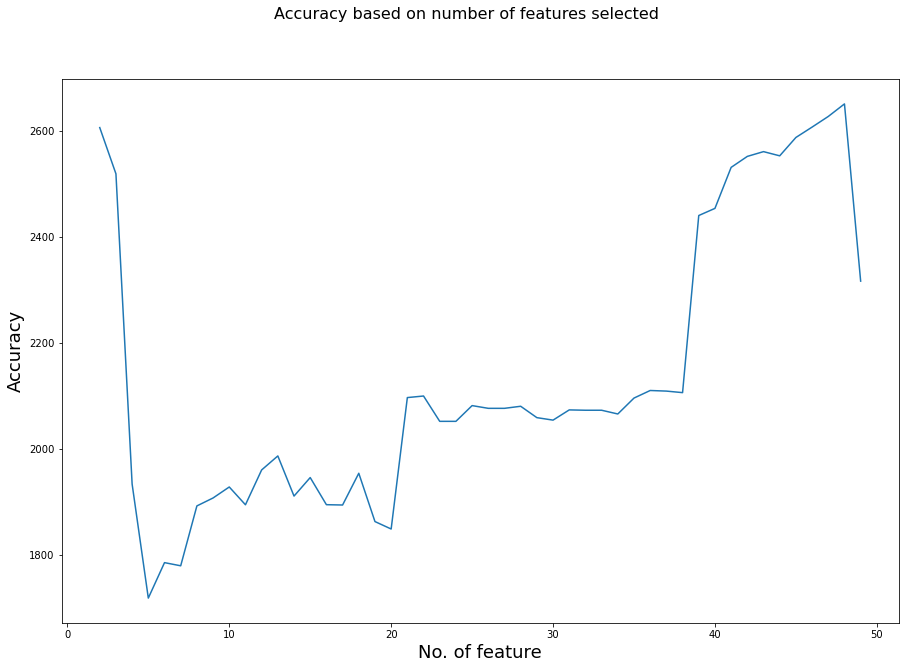

In [7]:
def L0_Normalization(X_data, Y_data, keep_N):
    ''' 
    This function selects most influential features w.r.t. price, deletes other feature
    This fn. does following:
    1. Takes X data as input
    2. Club feature data and target data
    3. Evaluate covariance matrix
    4. Identify features that least co vary with "Price" (Consider off diag elem of covar matrix)
    5. Delete those feature columns from data
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           keep_N -> No. of features to be kept for training
    output: X_L0_Normdata -> 2D feature data np array of size "no of data points" X "keep_N"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            remove_ind -> list of indices of feature that were least influential to price.
            covar_price -> 1D np.array covariance w.r.t. price 
            ind_covar_price_drop -> list indices of the dropped feature
    '''
    Y_newdata = Y_data.reshape(len(Y_data), 1)
    complete_dataset = np.concatenate((X_data, Y_newdata), axis=1)
    Cov_mat = np.cov(complete_dataset, rowvar=False)
    covar_price = Cov_mat[:,-1]
    covar_price = np.delete(covar_price, -1)
    remove_ind = X_data.shape[1] - keep_N
    ind_covar_price_drop = np.argpartition(covar_price, remove_ind)[:remove_ind]
    X_L0_Normdata =np.delete(X_data, ind_covar_price_drop, axis=1)
    return X_L0_Normdata, Y_data, remove_ind, covar_price, ind_covar_price_drop


data_path = "./imports-85.data"
attrbute_in_seq = attribute

##### Preparing Automobile Dataset and setting it up for ML application #####

# Remove missing data, Select relevant feature, Making Data type uniform, One Hot Encodeing
# Feature Scaling, Converting from panda df to nparray, Random Data shuffling.
X_data, Y_data, feature_list = prepare_autodataset(data_path, attrbute_in_seq)

#Split data in Training and testing set (Not required for this question)
#X_train, X_test, Y_train, Y_test = traintest_split(X_data, Y_data, 0.25)

k=7
kNeighbour = 2

avg_kNN_err = []
no_feat = []
feat = []
for i in range(2,50):
    keep_N =i
    
    X_L0_Normdata, Y_data, remove_ind, covar_price, ind_covar_price_drop = L0_Normalization(X_data, Y_data, keep_N)
    # Prepare dataset for k-fold cross validation. Taking k = 7
    X_kfold, Y_kfold = validation_kfold(X_L0_Normdata, Y_data, k)
    err_all, avg_err = train_KNN_with_Kfold(X_kfold, Y_kfold, kNeighbour)
    avg_avg_err = sum(avg_err) / len(avg_err)
    no_feat.append(keep_N)
    avg_kNN_err.append(avg_avg_err)
    feat.append(covar_price)

    print("====================================================================================================")
    print("###### The KNN here is done with just ", keep_N, "number of features. Rest all discarded ######")
    print("====================================================================================================")
    print("KNN with ", k,"- fold validation and No. of neighbour considered: ", kNeighbour, "\n")
    print("The overall average error is: ", avg_avg_err ,"\n")

fig = plt.figure()
fig.set_size_inches(15, 10)
plt.plot(no_feat, avg_kNN_err)
fig.suptitle('Accuracy based on number of features selected', fontsize=16)
plt.xlabel('No. of feature', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)


From the given graph, It seems KNN classification based on just  4 , features yield best prediction for price of car


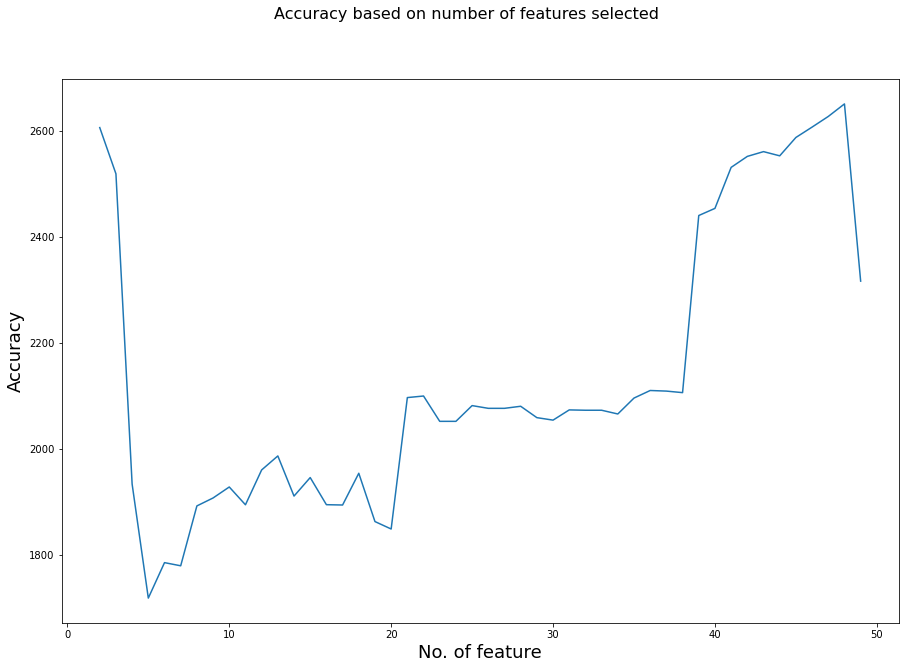

In [8]:
fig = plt.figure()
fig.set_size_inches(15, 10)
plt.plot(no_feat, avg_kNN_err)
fig.suptitle('Accuracy based on number of features selected', fontsize=16)
plt.xlabel('No. of feature', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
print("From the given graph, It seems KNN classification based on just ", (np.argmin(np.array(avg_kNN_err))+1),", features yield best prediction for price of car")

## features identified by the model for predicting prices. Comment on your findings drawing upon real-world intuitions about car prices.
Solution:

Th solution in the next cell indicates that following features have close association with the price of the car.

     1. 'make_jaguar'
     2. 'length',
     3. 'make_bmw',
     4. 'make_audi',
     5. 'horsepower',
     6. 'engine-size',
     7. 'curb-weight',
     8. 'height',
     9. 'width',
     10. 'num-of-doors_two'
     
     Point 1, 3, 4 are brands that manufacture higher segment cars (thus having high price). Hence the variation of price depends on these brands.
     
     Point 2, 7, 8, 9 highlights the dimension of the car. Bigger cars are in quite often costlier as well on the other hand smaller cars are cheaper. Thus dimension of a car seems closely related to its pricing
     
     Point 5 and 6 defines the capacity of the car. It is obvious that more powerful cars will be costlier.
     
     Point 10 highlights the high cost of sports car as these cars have just 2 doors

In [10]:
def L0_Normalization(X_data, Y_data, keep_N):
    ''' 
    This function selects most influential features w.r.t. price, deletes other feature
    This fn. does following:
    1. Takes X data as input
    2. Club feature data and target data
    3. Evaluate covariance matrix
    4. Identify features that least co vary with "Price" (Consider off diag elem of covar matrix)
    5. Delete those feature columns from data
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           keep_N -> No. of features to be kept for training
    output: X_L0_Normdata -> 2D feature data np array of size "no of data points" X "keep_N"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            remove_ind -> list of indices of feature that were least influential to price.
            covar_price -> 1D cnp.array ovariance w.r.t. price
    '''
    Y_newdata = Y_data.reshape(len(Y_data), 1)
    complete_dataset = np.concatenate((X_data, Y_newdata), axis=1)
    Cov_mat = np.cov(complete_dataset, rowvar=False)
    covar_price = Cov_mat[:,-1]
    covar_price = np.delete(covar_price, -1)
    remove_ind = X_data.shape[1] - keep_N
    covar_price = np.argpartition(covar_price, remove_ind)[:remove_ind]
    X_L0_Normdata =np.delete(X_data, covar_price, axis=1)
    return X_L0_Normdata, Y_data, remove_ind, covar_price
    

data_path = "./imports-85.data"
attrbute_in_seq = attribute

##### Preparing Automobile Dataset and setting it up for ML application #####

# Remove missing data, Select relevant feature, Making Data type uniform, One Hot Encodeing
# Feature Scaling, Converting from panda df to nparray, Random Data shuffling.
X_data, Y_data, feature_list = prepare_autodataset(data_path, attrbute_in_seq)

#Split data in Training and testing set (Not required for this question)
#X_train, X_test, Y_train, Y_test = traintest_split(X_data, Y_data, 0.25)


keep_N = 10

X_L0_Normdata, Y_data, remove_ind, covar_price = L0_Normalization(X_data, Y_data, keep_N)

# Prepare dataset for k-fold cross validation. Taking k = 7
k=7
X_kfold, Y_kfold = validation_kfold(X_L0_Normdata, Y_data, k)



kNeighbour = 2
err_all, avg_err = train_KNN_with_Kfold(X_kfold, Y_kfold, kNeighbour)
avg_avg_err = sum(avg_err) / len(avg_err)

print("====================================================================================================")
print("###### The KNN here is done with just ", keep_N, "number of features. Rest all discarded ######")
print("====================================================================================================")

print("The overall average error is: ", avg_avg_err ,"\n")



feat_selected = np.argpartition(covar_price, -keep_N)[-keep_N:]

print("Following are the top", keep_N, "features on which price depends")
[feature_list[x] for x in feat_selected]

###### The KNN here is done with just  10 number of features. Rest all discarded ######
The overall average error is:  2235.0663265306125 

Following are the top 10 features on which price depends


['make_bmw',
 'height',
 'body-style_hatchback',
 'length',
 'width',
 'curb-weight',
 'horsepower',
 'make_audi',
 'engine-size',
 'num-of-doors_two']

# Q2 Based on Consensus Income Dataset from the UCI Repository

## Following are some useful customized function in order to solve for Q2

In [62]:
attribute_in_seq_cons = ['age', 'workclass', 'fnlwgt', 'education',
            'education-num', 'marital-status', 'occupation','relationship',
            'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
            'native-country', 'salary']

def clean_n_feature_mod_df(df):
    ''' 
    This fn is a part of data preprocessing. This fn. does following:
    1. Impute Missing data by replacing "?" in the data by mode of that feature, 
    2. combines some feature label which may be irrelevant like in education many categories exist
    
    input: df -> panda dataframe
    output: df - panda dataframe (after processing)
    '''
    df['workclass'] = df['workclass'].replace(' ?', ' Private')
    df['occupation'] = df['occupation'].replace(' ?', ' Prof-specialty')
    df['native-country'] = df['native-country'].replace(' ?', ' United-States')
    ## Feature Engineering
    df.education= df.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], ' school')
    df.education = df.education.replace(' HS-grad', ' high school')
    df.education = df.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], ' higher')
    df.education = df.education.replace(' Bachelors', ' undergrad')
    df.education = df.education.replace(' Masters', ' grad')
    df.education = df.education.replace(' Doctorate', ' doc')

    #martial status
    df['marital-status']= df['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], ' married')
    df['marital-status']= df['marital-status'].replace([' Never-married'], ' not-married')
    df['marital-status']= df['marital-status'].replace([' Divorced', ' Separated',' Widowed',
                                                    ' Married-spouse-absent'], ' other')
    #df['salary'].replace(' <=50K', 0, inplace=True)
    #df['salary'].replace(' >50K', 1, inplace=True) 
    return df

def panda2nparray(df):
    '''
    This fn is a part of data preprocessing.
    This fn. does following:
    1. Converts pandas data frame to numpy array of data.
    2. separates X data (features) and Y data (target)
    3. stores sequence of feature as arranged in numpy array 
    
    input: df -> panda dataframe
    output: X_data -> 2D feature data np array of size "no of data points" X "no of features"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            feature_list - a list (having feature name in seq. corresponding to columns of X_data)
    '''
    feature_list = df.columns
    data = df.to_numpy()
    X_data = data[:,:-1]
    Y_data = data[:,-1]
    return X_data, Y_data, feature_list

def random_shuffle(X_data, Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. randomly shuffles X and Y data
    2. keeps a track of correspondence between X and Y.
    3. Feature sequence of X data remains unaltered.
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
    output: X_data_shuffle -> randomly shuffled 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target array (here, price) of length "no of data points" corresponding to "X_data_shuffle"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    seq = []
    for l in range(no_data_points):
        seq.append(l)
        np.random.shuffle(seq)

    X_data_shuffle = []
    Y_data_shuffle = []

    for m in range(no_data_points):
        X_data_shuffle.append(X_data[seq[m],:])
        Y_data_shuffle.append(Y_data[seq[m]])

    X_data_shuffle = np.array(X_data_shuffle)
    Y_data_shuffle = np.array(Y_data_shuffle)
    
    return X_data_shuffle, Y_data_shuffle

def feature_label_encoding(X_data, col_indices):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. encodes categorical data with numeric (categ. data are defined by "col_indices")
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           col_indices -> list of indices of features which are categorical
    output: X_data_encoded -> numeric encoded 2D feature data np array of size "no of data points" X "no of features"
            col_indices -> list of indices of features which are categorical
            label_code -> list of label tag and code mapping (via index)
    '''
    no_datapoints = X_data.shape[0]
    X_data_encoded = np.copy(X_data)
    label_code = []
    for i in col_indices:
        unique_labels = np.unique(X_data[:,i]).tolist()
        for j in range(no_datapoints) :
            X_data_encoded[j,i] = unique_labels.index(X_data[j,i])
        label_code.append(unique_labels)
    return X_data_encoded, col_indices, label_code

def traintest_split(X_data, Y_data, test_size):
    ''' 
    This fn splits dataset into training and testing data.
    This fn. does following:
    1. splits dataset into training and testing data.
    2. based on fraction ("test_size")
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           test_size -> float, fraction of data to be splitted as test, rest is training
    output: X_train -> 2D feature data np array of size "(1-test_size) * no of data points" X "no of features"
            X_test -> 2D feature data np array of size "(test_size) * no of data points" X "no of features"
            Y_train -> 1D target np array (here, price) of length "(1-test_size) * no of data points"
            Y_test -> 1D target np array (here, price) of length "(test_size) * no of data points"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    no_data_points_test = int(np.floor(no_data_points * test_size))
    no_data_points_train = no_data_points - no_data_points_test
    
    X_train = X_data[0:no_data_points_train,:]
    X_test = X_data[no_data_points_train:,:]
    Y_train = Y_data[0:no_data_points_train]
    Y_test = Y_data[no_data_points_train:]
    
    return X_train, X_test, Y_train, Y_test

def test_label_encoding(X_data, col_indices, label_code):
    ''' 
    This fn is a part of data preprocessing for test_data.
    This fn. does following:
    1. encodes categorical data with numeric (categ. data are defined by "col_indices")
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           col_indices -> list of indices of features which are categorical
    output: X_data_encoded -> numeric encoded 2D feature data np array of size "no of data points" X "no of features"
            col_indices -> list of indices of features which are categorical
            label_code -> list of label tag and code mapping (via index)
    '''
    no_datapoints = X_data.shape[0]
    X_data_encoded = np.copy(X_data)
    for i in col_indices:
        for j in range(no_datapoints) :
            print(j)
            print(i)
            print(label_code[i])
            X_data_encoded[j,i] = label_code[i].index(X_data[j,i])
    return X_data_encoded

def test_target_label_encoding(Y_data):
    '''
    This fn is a part of data preprocessing.
    This fn. does following:
    1. encodes categorical data of target only with numeric 
    input: Y_data -> 1D feature data np array of length "no of data points"
    output: Y_data_encoded -> randomly shuffled 2D feature data np array of size "no of data points" X "no of features"
            unique_labels -> list of label tag and code mapping (via index)
    '''
    no_datapoints = Y_data.shape[0]
    Y_data_encoded = np.copy(Y_data)
    for j in range(no_datapoints) :
        Y_data_encoded[j] = unique_labels.index(Y_data[j])
    return Y_data_encoded

class Node():
    '''
    This class define a Node with following properties:
    1. feature_index -> for decision node  - index of feature considered to take decision
    2. threshold -> for decision node - threshold on whose criteria node is based
    3. left -> for decision node - left child
    4. right -> for decision node - right child
    5. info_gain -> for decision node - information gain after splitting at this node
    6. value -> for leaf node - classification at the leaf node
    '''
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain        
        self.value = value

class DecisionTreeClassifier():
    '''
    This class define a Node with following properties:
    1. min_samples_split -> below this no. splitting won't happen
    2. max_depth -> depth can not go more than max_depth
    '''
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''        
        self.root = None        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' 
        Main function that builds the tree recursively. Initially assigns curr_depth at 0, later increases in program
        Input: dataset -> np array - contain complete data (no_datapoints X no_features), last column is target
        Output: Node
        ''' 
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])        
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' 
        Main function that splits the data at each decision node.
        Input: dataset -> np array - contain complete data (no_datapoints X no_features), last column is target
               num_samples -> no. of samples in data
               num_features -> no.of features in data
        Output: best_split -> dictionary with keys feature_index, threshold, dataset_left, dataset_right,info_gain
        '''         
        best_split = {}
        max_info_gain = -float("inf")        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' 
        Function that splits the dataset based on threshold criteria on particular feature.
        Input: dataset -> np array - contain complete data (no_datapoints X no_features), last column is target
               feature_index -> int
               threshold -> float
        Output: dataset_left -> np array - segregated dataset for left child based on criteria
                dataset_right -> np array - segregated dataset for right child based on criteria
        '''
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' 
        Function that information gain after splitting.
        Input: parent -> parent node
               l_child -> left child node
               r_child -> right child node
               mode -> method of computation of purity (entropy or gini)
        Output: gain -> float - information gain because of splitting
        '''
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' 
        Function that computes entropy.
        Input: y - data classification tags
        Output: entropy -> float - entropy value
        '''
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' 
        Function that computes gini index.
        Input: y - data classification tags
        Output: gini -> float - gini index value
        '''
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' 
        Function that computes classification value.
        Input: y - data classification tags
        Output: entropy -> float - entropy value
        '''
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' 
        Function to print schematically.
        '''
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' 
        Function that fits the tree. calls build tree
        Input: X - np array - contain data (no_datapoints X no_features)
               y - data classification tags
        '''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' 
        Function predicts for set of observations.
        Input: X -> np array - contain data (no_datapoints X no_features)
        Output: prediction -> category label 
        '''
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' 
        Function predicts for single observation.
        Input: X -> np array - contain data (no_features,)
        Output: prediction -> category label
        '''
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


# Solution to 2a 
## train  a  decision  tree  classification  model  using  information  gain  as  the  splitting  criterion  and using only single feature decision stumps at all non-leaf nodes and majority votes at leaf nodes, and report its validation set performance using % accuracy 

In [67]:
data_path = "./adult.data"
categorical_col_indices = [1, 3, 5, 6, 7, 8, 9, 13]
df = pd.read_csv(data_path, names = attribute_in_seq_cons)

# Data Pre processing step for Training data.
# Impute Missing data, combines some feature label, panda df to np array, shuffle data,
# label encoding to numeric, 
clean_df = clean_n_feature_mod_df(df)
X_data, Y_data, feature_list = panda2nparray(clean_df)
X_data_shuffle, Y_data_shuffle = random_shuffle(X_data, Y_data)
X_data_encoded, col_indices, label_code = feature_label_encoding(X_data_shuffle, categorical_col_indices)
Y_data_encoded, unique_labels = target_label_encoding(Y_data_shuffle)

# Splitting
X_train, X_test, Y_train, Y_test = traintest_split(X_data_encoded, Y_data_encoded, 0.25)
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

In [68]:
# Fitting a Decision Tree Classifier
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train, Y_train)
classifier.print_tree()

X_5 <= 0 ? 0.07263714675644556
 left:X_4 <= 12 ? 0.06105643509084557
  left:X_10 <= 5013 ? 0.04393892489861767
    left:X_3 <= 3 ? 0.01546817959439234
        left:0
        right:0
    right:X_0 <= 69 ? 0.009251514627641677
        left:1
        right:0
  right:X_10 <= 5013 ? 0.028031273808315604
    left:X_11 <= 1740 ? 0.020378113199234493
        left:1
        right:1
    right:X_0 <= 80 ? 0.001964388555473949
        left:1
        right:1
 right:X_10 <= 6849 ? 0.02914859161113073
  left:X_4 <= 12 ? 0.004788181912917425
    left:X_11 <= 2339 ? 0.0021366890074102085
        left:0
        right:1
    right:X_0 <= 32 ? 0.01580911625487816
        left:0
        right:0
  right:X_0 <= 20 ? 0.024745058237880944
    left:0
    right:X_2 <= 24763 ? 0.00850414156575471
        left:0
        right:1


In [69]:
Y_pred = classifier.predict(X_test)
compare = Y_test == Y_pred
accuracy = (sum(compare)[0]/len(compare)) * 100

print("====================================================================================================")
print("====================================================================================================")
print("The accuracy of trained Decision Tree on test data is ", accuracy, "%% " )
print("====================================================================================================")
print("====================================================================================================")



The accuracy of trained Decision Tree on test data is  75.6019656019656 %% 


# Solution 2 b
## use cross-validation to optimize the tree hyperparameters

 In this part minimum sample size (mss) is considered the tunable hyper parameter and thus is tuned using 7- fold cross validation. The minimum sample size (mss) is varied fro 3 to 15 in order to check which one performs better. The best can be considered to avoid overfitting

In [ ]:
def validation_kfold(X_train, Y_train, k):
    ''' 
    This function implements K-fold validation
    This fn. does following:
    1. splits dataset into "k" distinct sets
    2. arrange all k sets in a specific format
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           test_size -> float, fraction of data to be splitted as test, rest is training
    output: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
            Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
    '''
    no_data_points = X_train.shape[0]
    no_feature = X_train.shape[1]
    no_each_set = int(np.floor(no_data_points/k))
    #print(no_each_set)
    X_kfold = []
    Y_kfold = []
    temp_X = []
    temp_Y = []
    for i in range(k):
        for j in range(no_each_set):
            temp_X.append(X_train[(no_each_set*i)+j,:])
            temp_Y.append(Y_train[(no_each_set*i)+j])
        X_kfold.append(np.array(temp_X))
        Y_kfold.append(np.array(temp_Y))
        temp_X = []
        temp_Y = []
    X_kfold = np.array(X_kfold)
    Y_kfold = np.array(Y_kfold)
    return X_kfold, Y_kfold


def train_DecisionTree_with_Kfold(X_kfold, Y_kfold, mss, md):
    ''' 
    This function trains a KNN classifier using k-fold validation.
    This fn. does following:
    1. Takes a data as output of "validation_kfold" i.e. k sets of data
    2. Picks one set and treat is as test data.  Compute distance from all other points in k-1 sets
    3. Evaluate "Kneighbor" points having least distances
    4. compute Avg Price from these "Kneighbor" ponts and determine error
    3. Take the error average for a set and stores in a list
    
    input: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
           Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
           mss -> hyperparameter - min_samples_split
           md -> hyperparameter - max_depth
    output: acc_all -> list of k lists. each sub list is least square error
    '''
    no_of_set = X_kfold.shape[0]
    no_dp_in_each_set = X_kfold.shape[1]
    no_feature = X_kfold.shape[2]
    acc_all = []
    for i in range(no_of_set):
        data_train =  np.zeros((1,no_feature))
        target_train = np.array([])
        data_eval = X_kfold[i,:,:]
        target_eval = Y_kfold[i,:]
        
        for j in range(no_of_set):
            if j!=i:
                data_train = np.append(data_train, X_kfold[j,:,:], axis = 0)
                target_train = np.append(target_train, Y_kfold[j,:])
        acc_loc = []
        data_train = np.delete(data_train, 0, axis=0)
        for k in range(no_dp_in_each_set):
            # Training Decision Tree
            
            target_train = target_train.reshape(len(target_train), 1)
            classifier = DecisionTreeClassifier(min_samples_split=mss, max_depth=md)
            classifier.fit(data_train, target_train)
            #Predicting using Decision Tree
            Y_pred = classifier.predict(data_eval)
            compare = target_eval == Y_pred
            accuracy = (sum(compare)[0]/len(compare)) * 100
            acc_loc.append(accuracy)
        acc_all.append(sum(acc_loc)/len(acc_loc))
    final_acc = sum(acc_all)/len(acc_all)
    return acc_all, final_acc

data_path = "./adult.data"
categorical_col_indices = [1, 3, 5, 6, 7, 8, 9, 13]
df = pd.read_csv(data_path, names = attribute_in_seq_cons)

# Data Pre processing step for Training data.
# Impute Missing data, combines some feature label, panda df to np array, shuffle data,
# label encoding to numeric, 
clean_df = clean_n_feature_mod_df(df)
X_data, Y_data, feature_list = panda2nparray(clean_df)
X_data_shuffle, Y_data_shuffle = random_shuffle(X_data, Y_data)
X_data_encoded, col_indices, label_code = feature_label_encoding(X_data_shuffle, categorical_col_indices)
Y_data_encoded, unique_labels = target_label_encoding(Y_data_shuffle)

# Splitting
X_train, X_test, Y_train, Y_test = traintest_split(X_data_encoded, Y_data_encoded, 0.25)
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_kfold, Y_kfold = validation_kfold(X_train, Y_train, 7)

# Hyper Parameters are
# 1. min_samples_split = mss, 
# 2. max_depth = md

#acc_all, final_acc = train_DecisionTree_with_Kfold(X_kfold, Y_kfold, mss, md)

#Considering "min_samples_split" as the tunable hyper parameter in this part
# Consider max_depth = md be fixed at 3
md = 3
    
avg_DT_acc = []
mss_arr = []
for mss in range(3,20):
    acc_all, final_acc = train_DecisionTree_with_Kfold(X_kfold, Y_kfold, mss, md)
    mss_arr.append(mss)
    avg_DT_acc.append(final_acc)
    print("The avg. accuracy for DT Classifier with ", min_samples_split, " neighbour is", final_acc, "\n")

fig = plt.figure()
fig.set_size_inches(15, 10)
plt.plot(mss_arr, avg_DT_acc)
fig.suptitle('Decision Tree ACCURACY \n using 7-fold cross-validation', fontsize=16)
plt.xlabel('min_samples_split', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
print("From the given graph of cross-validation for Decision Tree with mss = ", (np.argmax(np.array(avg_DT_acc))+3),", seems to be the best.")    